# Зачем нам визуализация?

Визуализация наглядно показывает тренды, паттерны и выбросы, которые тяжело увидеть в числах, особенно когда их много

![DinoUrl](https://d2f99xq7vri1nk.cloudfront.net/DinoSequentialSmaller.gif "source: https://www.autodesk.com/research/publications/same-stats-different-graphs")

## Какой график выбрать?

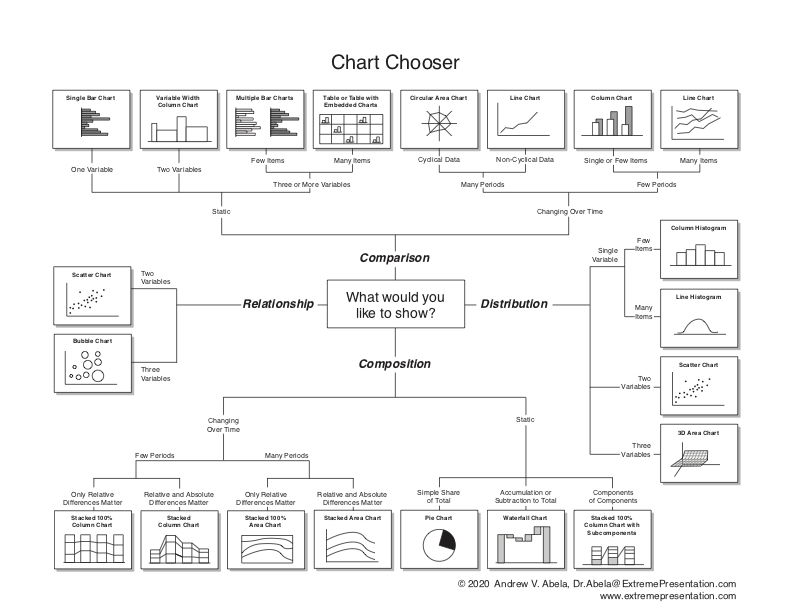

In [1]:
#import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
np.random.seed(5)

# Инструменты

## Matplotlib

Matplotlib — библиотека на языке программирования Python для визуализации данных двумерной и трёхмерной графикой.

[Документация](https://matplotlib.org/stable/tutorials/index)

### Line plot - функциональная зависимость

In [3]:
import matplotlib.pyplot as plt

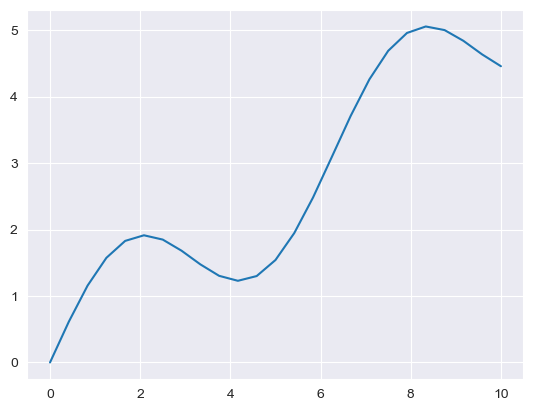

In [4]:
x = np.linspace(0, 10, 25)
y = np.sin(x) + x/2

fig, ax = plt.subplots()
ax.plot(x, y);

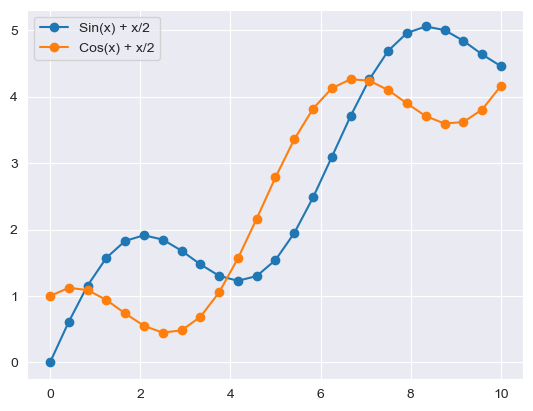

In [5]:
x1 = np.linspace(0, 10, 25)
y1 = np.sin(x1) + x1/2

x2 = np.linspace(0, 10, 25)
y2 = np.cos(x2) + x1/2

fig, ax = plt.subplots()
ax.plot(x1, y1, marker="o", label="Sin(x) + x/2")
ax.plot(x2, y2, marker="o", label="Cos(x) + x/2")
ax.legend();

### Box plot - статистические свойства: минимум, максимум, среднее, выбросы

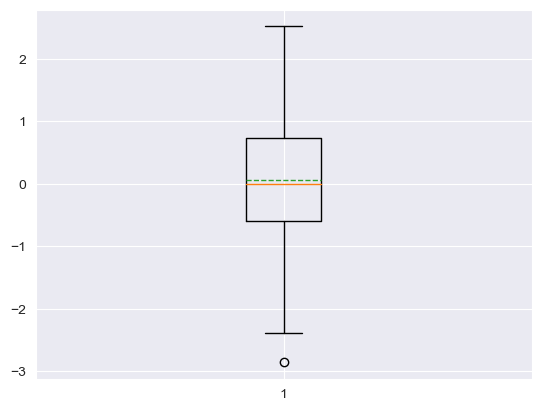

In [6]:
x = np.random.normal(0, 1, 200)

fig, ax = plt.subplots()
ax.boxplot(x, showmeans=True, meanline=True);

### Violin plot - похож на box plot, но с формой распределения

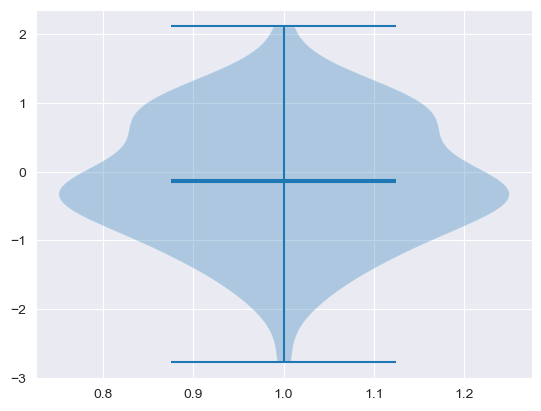

In [7]:
x = np.random.normal(0, 1, 100)

fig, ax = plt.subplots()
ax.violinplot(x, showmeans=True, showmedians=True);

### Гистограмма - визуализация непрерывных распределений

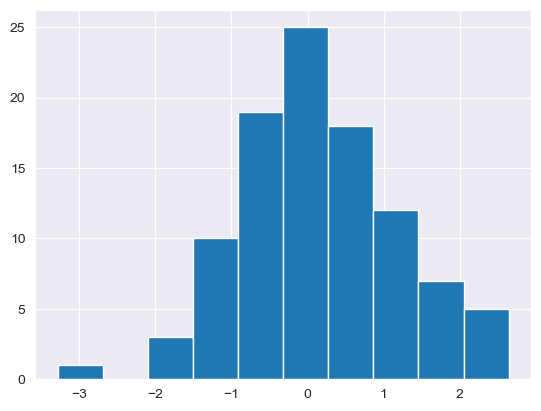

In [8]:
x = np.random.normal(0, 1, 100)

fig, ax = plt.subplots()
ax.hist(x);

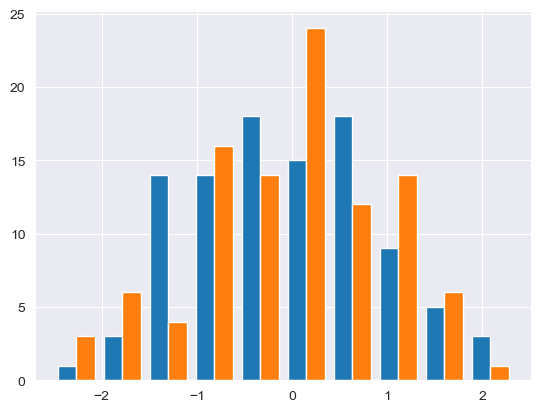

In [9]:
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)
x = [x1, x2]

fig, ax = plt.subplots()
ax.hist(x)
plt.show();

### Bar plot для сравнения категорий. Тип данных - категориальные.

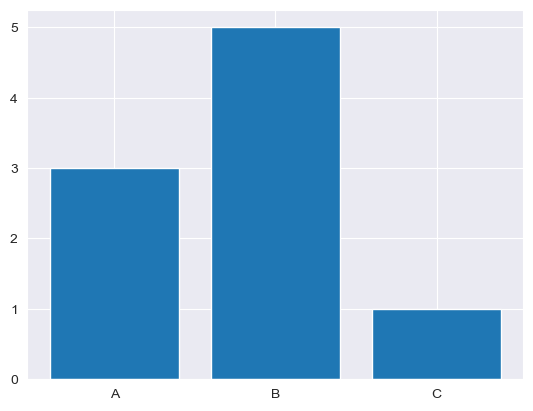

In [10]:
x = ["A", "B", "C"]
y = [3, 5, 1]

fig, ax = plt.subplots()
ax.bar(x = x, height=y);

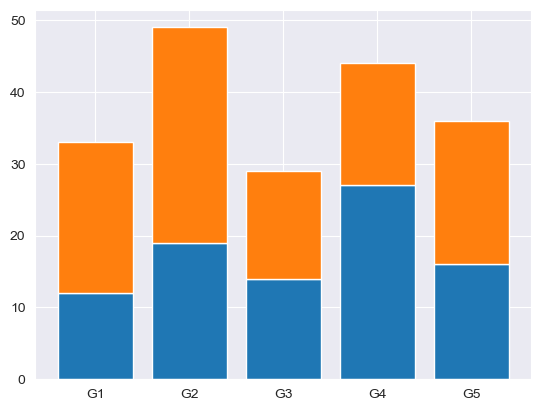

In [11]:
groups = ['G1', 'G2', 'G3', 'G4', 'G5']
values1 = [12, 19, 14, 27, 16]
values2 = [21, 30, 15, 17, 20]

fig, ax = plt.subplots()

ax.bar(groups, values1)
ax.bar(groups, values2, bottom=values1);

### Pie chart - показывает доли категорий от всей выборки

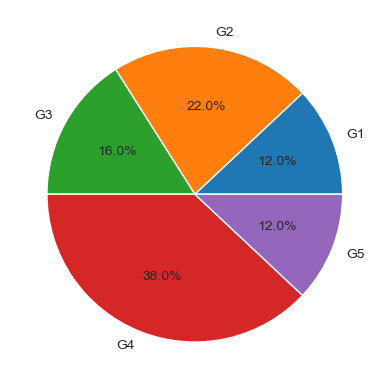

In [12]:
labels = ["G1", "G2", "G3", "G4", "G5"]
value = [12, 22, 16, 38, 12]

fig, ax = plt.subplots()
ax.pie(value, labels=labels, autopct='%1.1f%%');

### Scatter plot - показывает отношение между двумя переменными

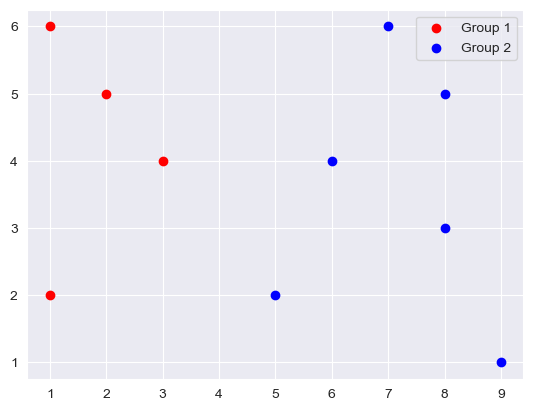

In [13]:
x1 = np.array([1, 1, 2, 3])
y1 = np.array([2, 6, 5, 4])

plt.scatter(x1, y1, c="red", label="Group 1")

x2 = np.array([5, 6, 7, 8, 8, 9])
y2 = np.array([2, 4, 6, 5, 3, 1])

plt.scatter(x2, y2, c="blue", label="Group 2")

plt.legend();

### Heatmap - для изображения коэффициентов корреляции

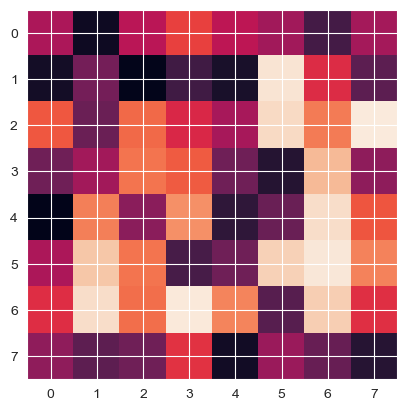

In [14]:
data = np.random.random((8, 8))

xlabs = ["G1", "G2", "G3", "G4",
         "G5", "G6", "G7", "G8"]
ylabs = ["A", "B", "C", "D",
         "E", "F", "G", "H"]


fig, ax = plt.subplots()
ax.imshow(data);

### Wordcloud

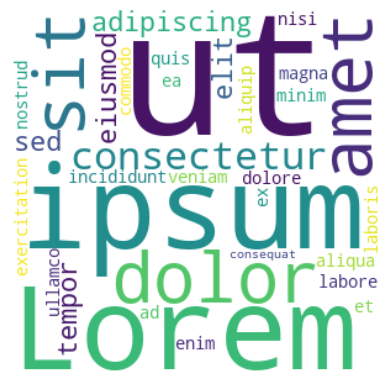

In [15]:
from wordcloud import WordCloud

text = """Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua.
Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat"""

wc = WordCloud(width=300, height=300, background_color="white")
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

## Seaborn

Seaborn — пакет для создания статистических графиков на Python. Основывается на matplotlib и абстрагирует его сложность.

[Документация](https://seaborn.pydata.org/tutorial.html)

In [16]:
import random
import seaborn as sns

In [17]:
sns.set(rc={'figure.figsize':(10, 8)})

### Box plot

In [18]:
rng = np.random.RandomState(5)
variable = rng.normal(0, 1, size=100)
group = random.choices(["G1", "G2", "G3"], k=100)

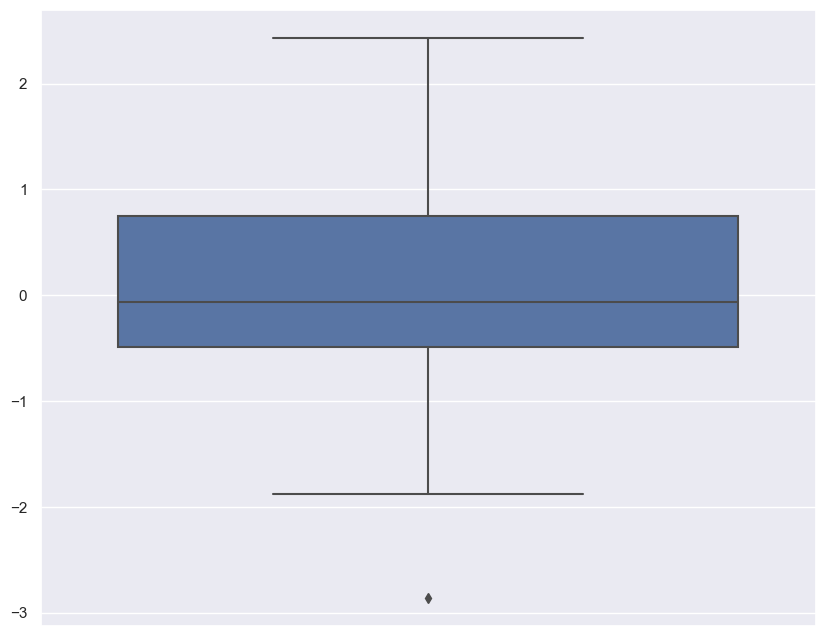

In [19]:
sns.boxplot(y=variable);

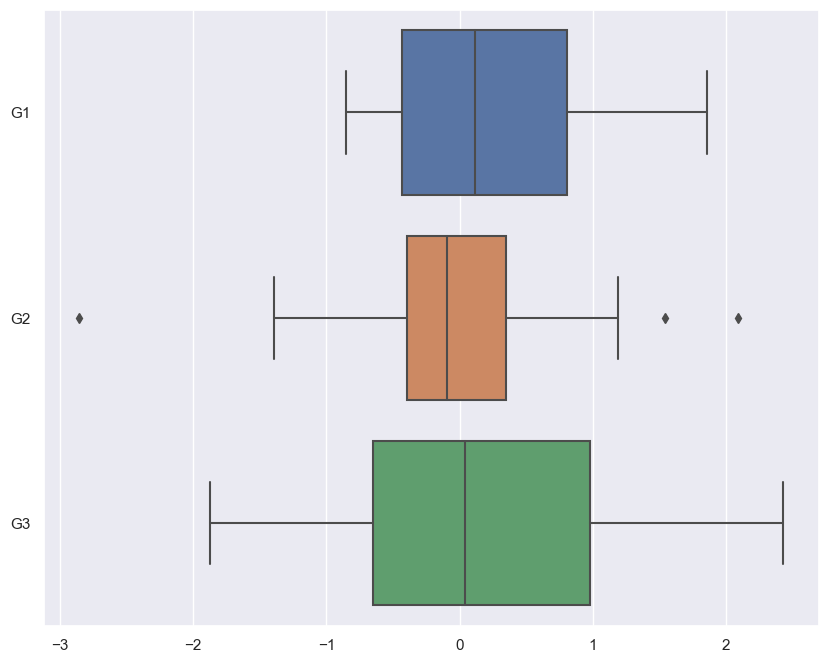

In [20]:
sns.boxplot(x=variable, y=group);

### Scatter plot

In [21]:
x = rng.uniform(0, 1, 500)
y = 5 * x + rng.normal(0, 2, size = 500)
group = np.where(x < 0.4, "A", np.where(x > 0.8, "C", "B"))
x = x + rng.uniform(-0.2, 0.2, 500)
df = {'x': x, 'y': y, 'group': group}

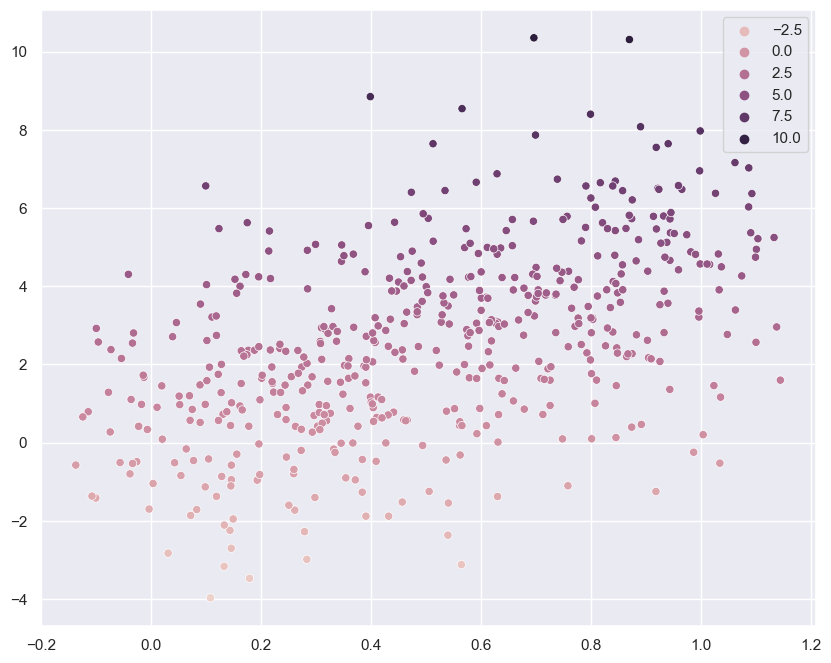

In [22]:
sns.scatterplot(x=x, y=y, hue=y);

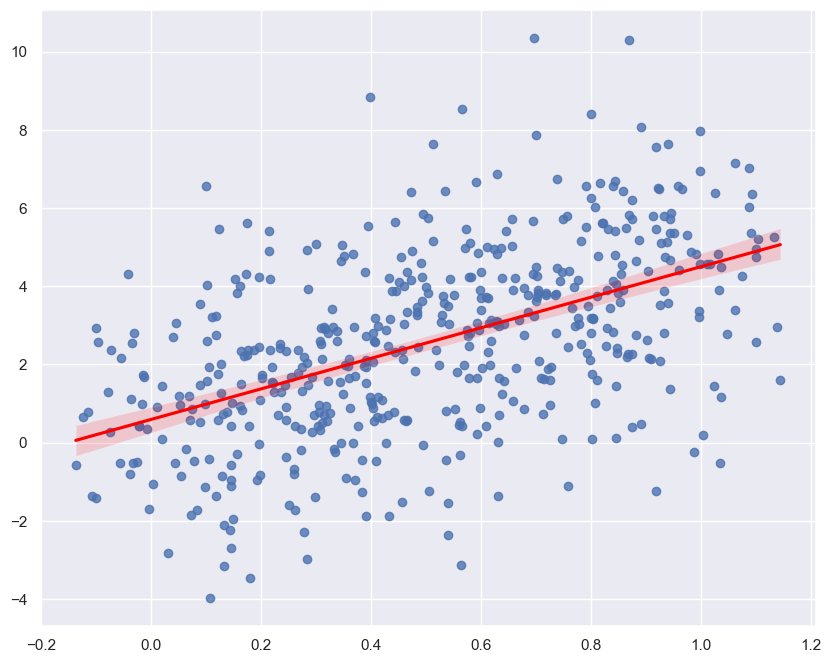

In [23]:
sns.regplot(x="x", y="y", data=df, line_kws={"color": "red"});

### Гистограмма

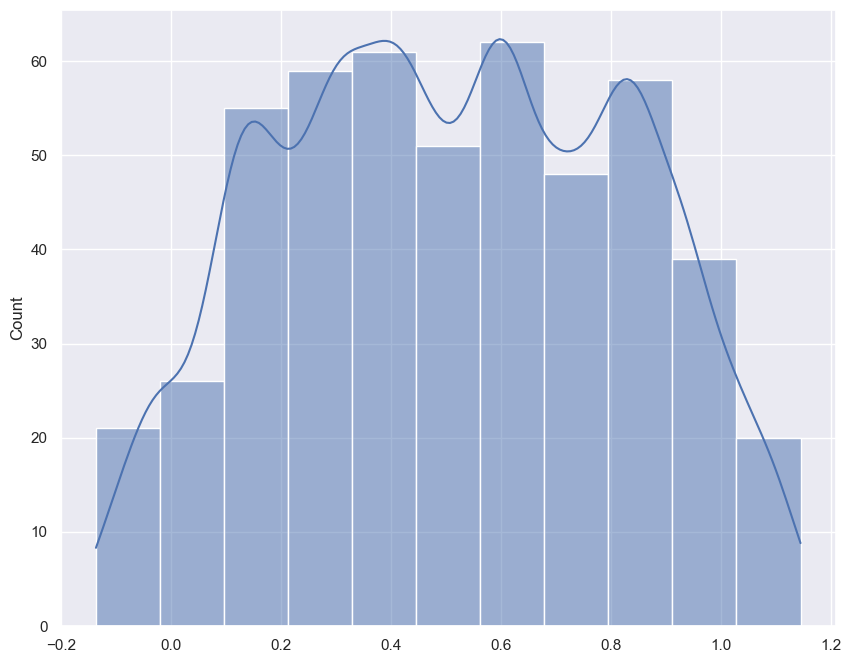

In [24]:
sns.histplot(x=x, kde=True, kde_kws={'bw_adjust': 0.5});

### Heatmap

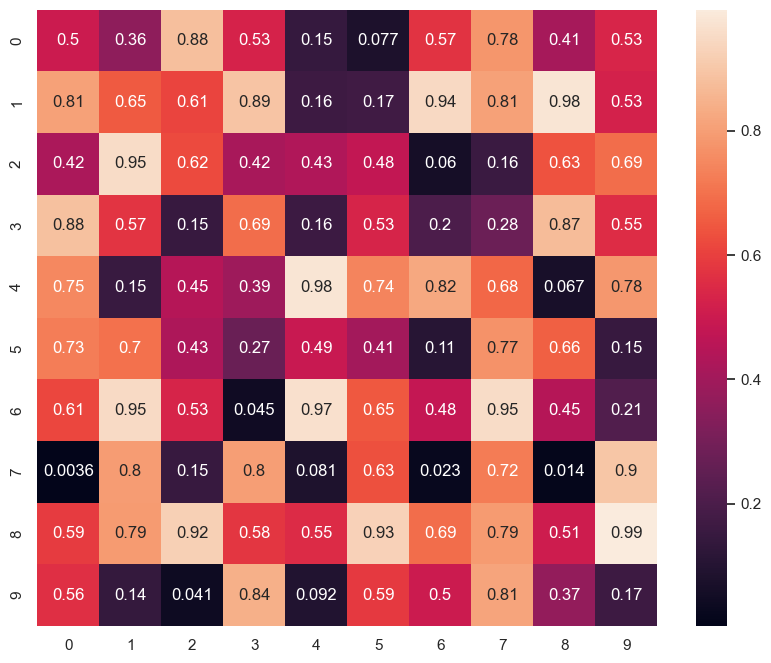

In [25]:
sns.heatmap(np.random.rand(10, 10), annot=True);

### Pair plot

In [26]:
df = sns.load_dataset("iris")
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

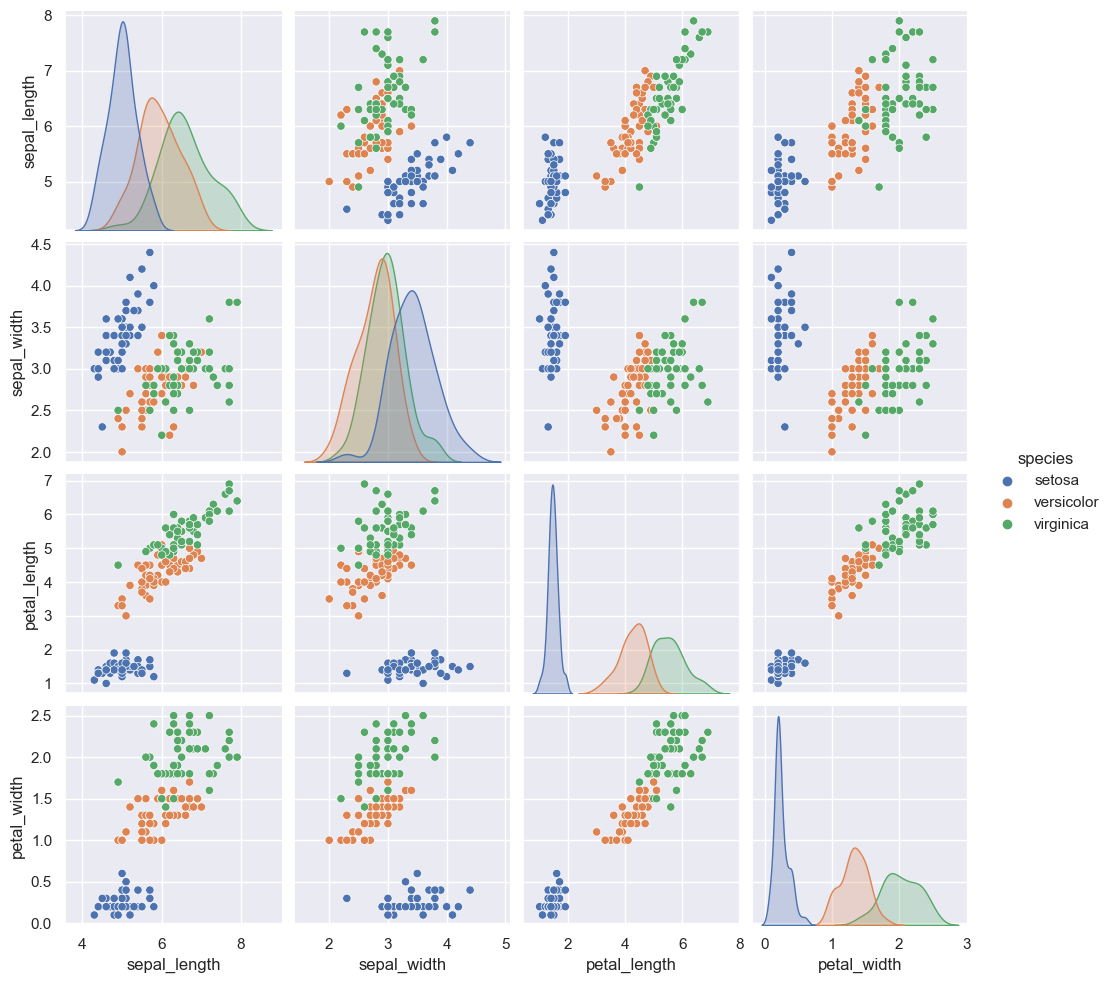

In [27]:
sns.pairplot(df, hue="species");

### Joint distribution plot

In [28]:
df = sns.load_dataset("penguins")
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

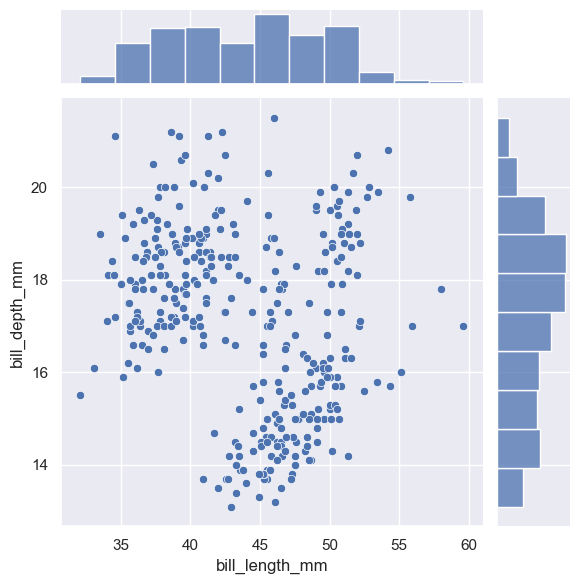

In [29]:
sns.jointplot(data=df, x="bill_length_mm", y="bill_depth_mm");